### Reinformanet Learning 

1. import Lib os -----> operating system
2. import gym ------> open AI gym working envirment
3. stable baseline3 is the main lib. where are algo has been devleoped 
4. import dummy vector envirment for testing 
5. import evaluation policy for easier to make the testing, standard diviation 

In [1]:
# we are using stable base 3 in this application simulation envirment 

import os # operationg system  
import gym # open AI gym working envirment 
from stable_baselines3 import PPO # PPO is algorithm  
from stable_baselines3.common.vec_env import DummyVecEnv # this vectorize envirment for 
from stable_baselines3.common.evaluation import evaluate_policy # easier to make the testing, standard diviation 

### https://gym.openai.com/envs/#robotics
1. https://www.youtube.com/watch?v=Mut_u40Sqz4

### load envirment name as cartpole

In [2]:
environment_name = "CartPole-v0"  # calling the envirment 
                                  # cost effective simulation and  training 
                                  # can be used in the game 
                                

In [3]:
env = gym.make(environment_name)  #calling the envirment 

### For initial model visolization 

In [6]:
# action space and observation space 
episodes = 15 # total number of tests 
for episode in range(1, episodes+1):   # passing loop 
    state = env.reset()               # reseting the envirment 
    done = False                      
    score = 0 
    
    while not done:
        env.render()                  # reder allow the view the envirment 
        action = env.action_space.sample()  # action sample will generate the random actions 
        n_state, reward, done, info = env.step(action) # passing random action to the envirment 
        # the upper line is unpacking the parameter for step action and after the reward is going to add 
        score+=reward   # reward for score as 1 0 
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:17.0
Episode:2 Score:27.0
Episode:3 Score:24.0
Episode:4 Score:17.0
Episode:5 Score:44.0
Episode:6 Score:11.0
Episode:7 Score:26.0
Episode:8 Score:23.0
Episode:9 Score:15.0
Episode:10 Score:24.0
Episode:11 Score:31.0
Episode:12 Score:15.0
Episode:13 Score:18.0
Episode:14 Score:16.0
Episode:15 Score:70.0


In [7]:
episodes = 15 # total number of tests 
for episode in range(1, episodes+1):
    print(episode)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [8]:
env.reset(),n_state

(array([-0.04802967, -0.02424394,  0.0401069 ,  0.00545218]),
 array([-0.17771144, -0.34420773, -0.21661395, -0.72851607]))

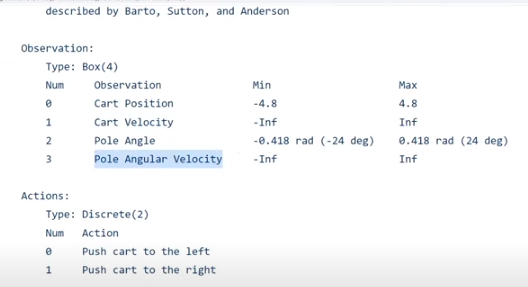

In [9]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [18]:
env.action_space.sample()

1

info = env.step(action)
info

In [19]:
n_state

array([-0.17771144, -0.34420773, -0.21661395, -0.72851607])

### calling the envirment 

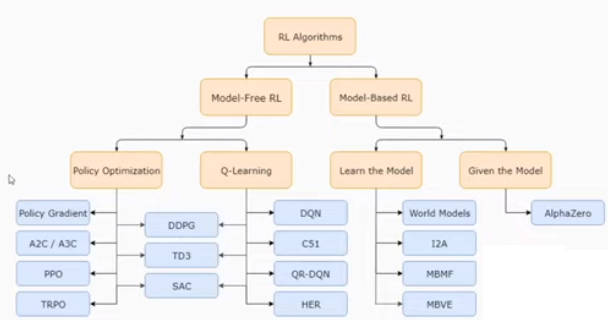

1. model free RL use current state values for its prediction 
2. model bsed RL used the future based values for its prediction 


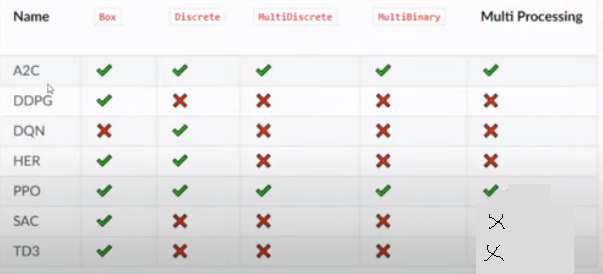

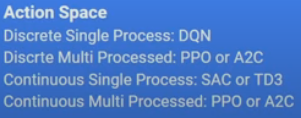

# for training of the model 
1. Calling the envirment 
2. calling the dummy vector space with passing the lambda function 
3. creating the model as multi layer preseptrone policy
4. showing the CPU as sloving resource 
5. ..........................

In [20]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env]) # dummy vector with lambda function 
model = PPO('MlpPolicy', env, verbose = 1)  # multi layer preseptrone policy 
                                            # it just using the standard neural network for training the model

Using cpu device


# start learning 
1. with time steps as 20000
2. fps frame per second 
3. explained_variance
4. 

In [21]:
model.learn(total_timesteps=20000) # time steps are the time at which model is going to train 

-----------------------------
| time/              |      |
|    fps             | 533  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 350         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007929672 |
|    clip_fraction        | 0.0824      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.0129     |
|    learning_rate        | 0.0003      |
|    loss                 | 7.86        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 53.3        |
-----------------------------------------
----------------------------------

# saving the model 
1. folder name is training 
2. then save model folder 
3. then PPO_model in zip file 
4. then relodind the model using PPO.load(PPO_path,env=env)
5. PPO_path command shows the complete path for the saved model 

In [22]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')


In [23]:
model.save(PPO_path)

In [24]:
PPO_path

'Training\\Saved Models\\PPO_model'

In [ ]:
#del model

In [25]:
model = PPO.load(PPO_path, env=env)
model

# evaluating and testing the model 
1. use evaluating throug reload the saved model
2. n_eval_episode = 10
3. render = true which has been used for visolization of envirment 
4. .........

In [26]:
evaluate_policy(model, env, n_eval_episodes=10, render=True) # average reward is 200 as shown below and standrad deveation is 0.0

C:\Users\Hisham Khalil\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(200.0, 0.0)

In [ ]:
env.close()